# Day 1

In [2]:
## Install Pandas Data Reader
#!pip install pandas-datareader

In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [4]:
df_tesla = pdr.get_data_yahoo('TSLA') # gets data of past 5 years of a stock eg. TESLA coded as 'TSLA' source Yahoo

<AxesSubplot:xlabel='Date'>

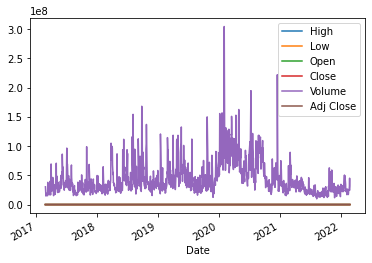

In [5]:
df_tesla.plot() #Volumne is huge hence only purple lines

<AxesSubplot:xlabel='Date'>

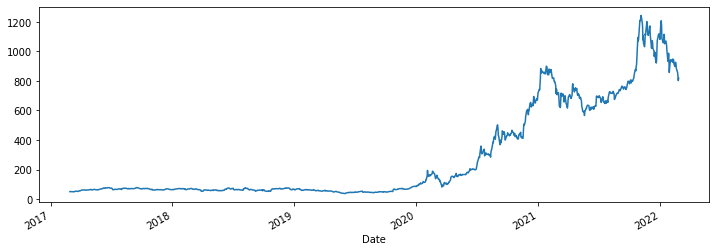

In [6]:
df_tesla['High'].plot(figsize = (12,4))

<AxesSubplot:xlabel='Date'>

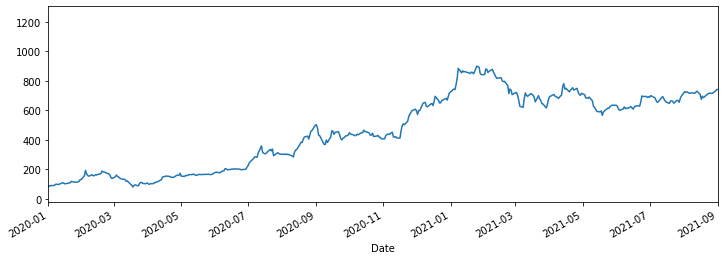

In [7]:
# Limiting x - to see the graph more closely
df_tesla['High'].plot(xlim = ['2020-01-01', '2021-09-01'], figsize = (12,4))

<AxesSubplot:xlabel='Date'>

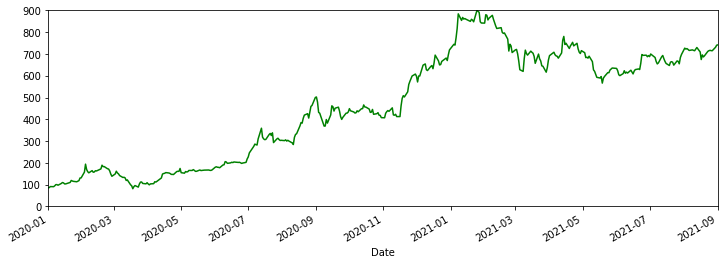

In [8]:
# Limiting x and y -- to see the graph more closely
df_tesla['High'].plot(xlim = ['2020-01-01', '2021-09-01'], ylim = [0,900], figsize = (12,4), c='green')

In [9]:
index = df_tesla.loc['2020-01-01': '2021-09-01'].index
share_open = df_tesla.loc['2020-01-01': '2021-09-01']['Open']

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

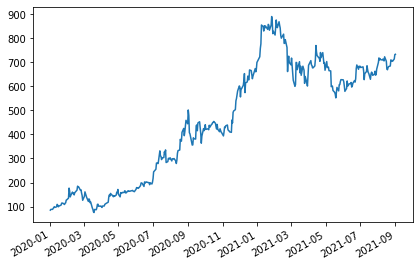

In [11]:
fig,ax = plt.subplots()
plt.tight_layout()
fig.autofmt_xdate() ## Prevents overlapping of the dates
ax.plot(index, share_open)

In [12]:
## Datetime index
df_tesla = df_tesla.reset_index()
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [13]:
df_tesla = df_tesla.set_index('Date', drop=True) # To set the indexes again

In [14]:
date = datetime(2021,11,21)

date.date()

datetime.date(2021, 11, 21)

In [15]:
date.day, date.weekday(), date.year


(21, 6, 2021)

### Time Resampling 

https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

In [16]:
df_tesla.resample(rule = 'A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,49.299999,48.556000,48.838001,48.737999,14597000.0,48.737999
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,802.479980,700.000000,700.390015,764.039978,16909700.0,764.039978


In [17]:
df_tesla.resample(rule = 'A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


<AxesSubplot:xlabel='Date'>

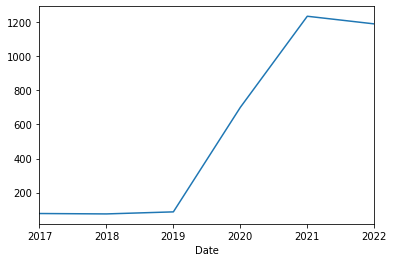

In [18]:
# Year end frequency
df_tesla.resample(rule = 'A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

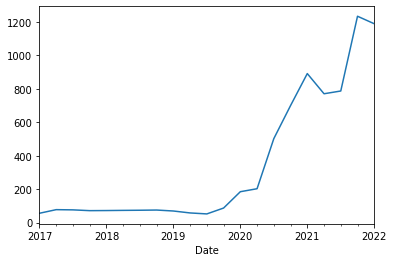

In [19]:
# Quarter start frequency
df_tesla.resample(rule = 'Q').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

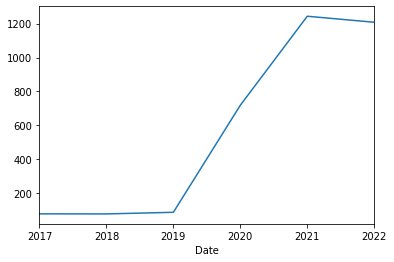

In [20]:
#Business End Frequency
df_tesla.resample(rule = 'BA').max()['High'].plot()


In [21]:
df_tesla.resample(rule = 'BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,56.400002,55.442001,55.745998,55.660000,39938000.0,55.660000
2017-04-03,77.398003,75.870003,77.337997,76.690002,86307000.0,76.690002
2017-07-03,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-02,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-02,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-02,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998


<AxesSubplot:xlabel='Date'>

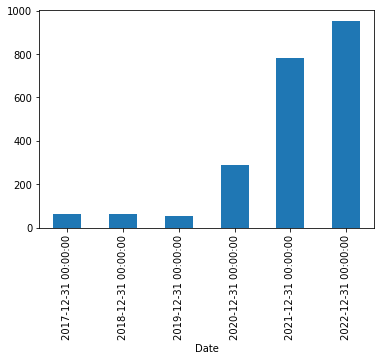

In [22]:
df_tesla.resample(rule = 'A').mean()['Open'].plot(kind='bar')

<AxesSubplot:xlabel='Date'>

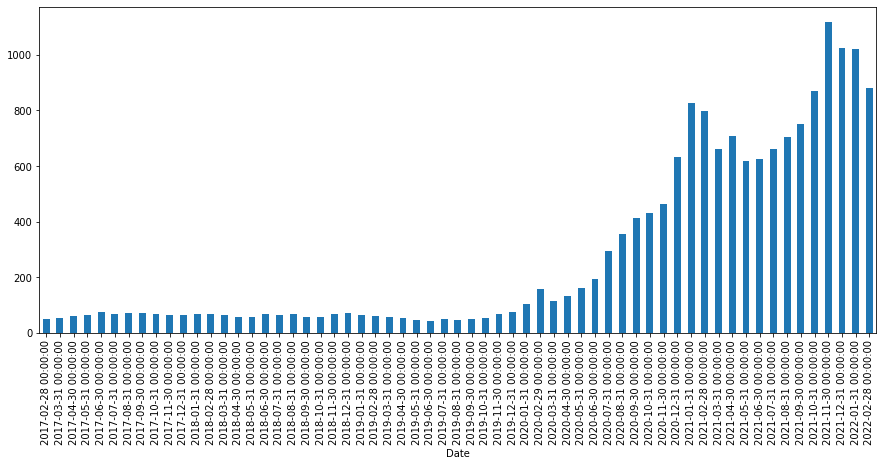

In [23]:
df_tesla.resample(rule = 'M').mean()['Open'].plot(kind='bar', figsize = (15,6))

In [24]:
df_tesla['High'].rolling(10).mean().head(20)

Date
2017-02-28        NaN
2017-03-01        NaN
2017-03-02        NaN
2017-03-03        NaN
2017-03-06        NaN
2017-03-07        NaN
2017-03-08        NaN
2017-03-09        NaN
2017-03-10        NaN
2017-03-13    50.1740
2017-03-14    50.3164
2017-03-15    50.4394
2017-03-16    50.6888
2017-03-17    50.9574
2017-03-20    51.2144
2017-03-21    51.4326
2017-03-22    51.5326
2017-03-23    51.7128
2017-03-24    52.0606
2017-03-27    52.5350
Name: High, dtype: float64

In [25]:
df_tesla['Open: 30 days Rolling'] = df_tesla['Open'].rolling(30).mean()

<AxesSubplot:xlabel='Date'>

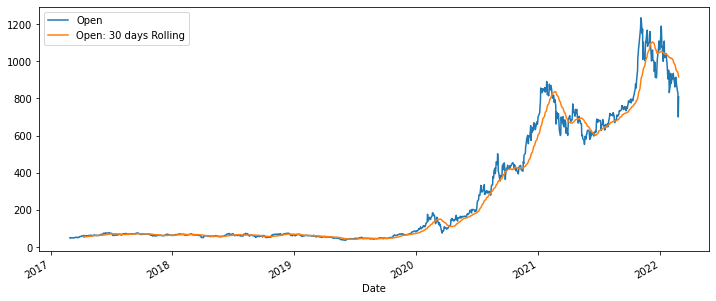

In [26]:
df_tesla[['Open', 'Open: 30 days Rolling']].plot(figsize = (12,5))

##### Assignment
1. Read the Microsoft data
2. Get the maximum price of the share from 2017 to 2022
3. Which is the day for the highest & lowest price of the stock(5 years)? Also read news for that day


# DAY 2


In [27]:
df_tesla = pdr.get_data_yahoo('TSLA') 

### Simple moving average

<AxesSubplot:xlabel='Date'>

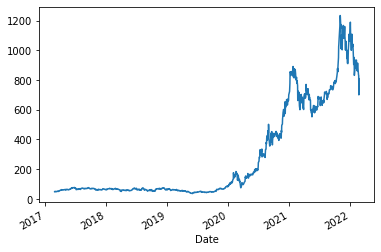

In [28]:
df_tesla['Open'].plot()

In [29]:
df_tesla['Open: 10 day Rolling'] = df_tesla['Open'].rolling(window = 10, min_periods = 1).mean()

<AxesSubplot:xlabel='Date'>

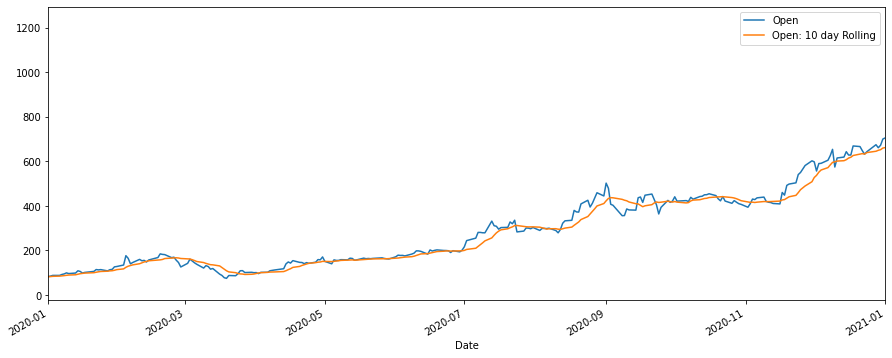

In [30]:
df_tesla[['Open','Open: 10 day Rolling']].plot(xlim = ['2020-01-01','2021-01-01'], figsize = (15,6))

<AxesSubplot:xlabel='Date'>

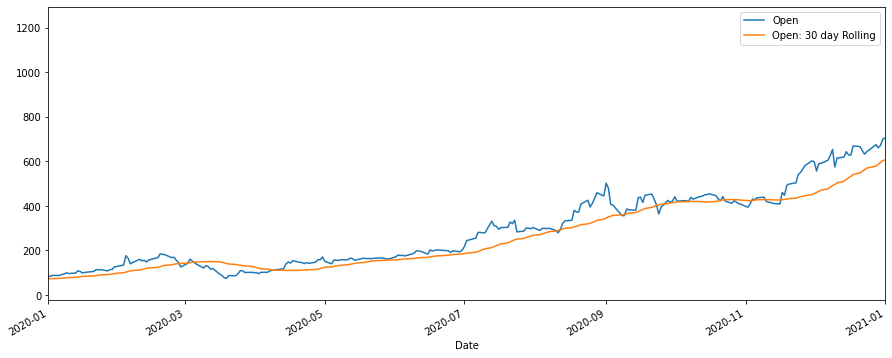

In [31]:
df_tesla['Open: 30 day Rolling'] = df_tesla['Open'].rolling(window = 30, min_periods = 1).mean()
df_tesla[['Open','Open: 30 day Rolling']].plot(xlim = ['2020-01-01','2021-01-01'], figsize = (15,6))

<AxesSubplot:xlabel='Date'>

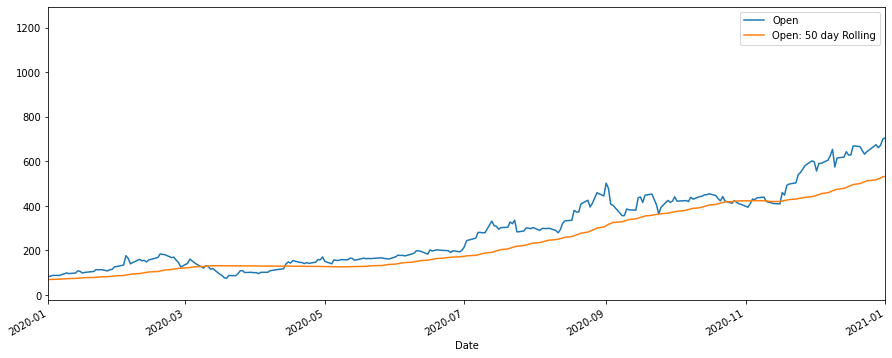

In [32]:
df_tesla['Open: 50 day Rolling'] = df_tesla['Open'].rolling(window = 50, min_periods = 1).mean()
df_tesla[['Open','Open: 50 day Rolling']].plot(xlim = ['2020-01-01','2021-01-01'], figsize = (15,6))

<AxesSubplot:xlabel='Date'>

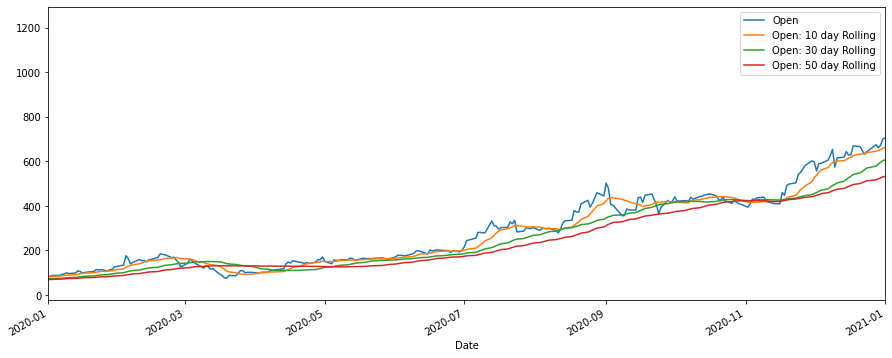

In [33]:
cols = ['Open','Open: 10 day Rolling','Open: 30 day Rolling','Open: 50 day Rolling' ]
df_tesla[cols].plot(xlim = ['2020-01-01','2021-01-01'], figsize = (15,6))

###  Cumulative Moving Average

<AxesSubplot:xlabel='Date'>

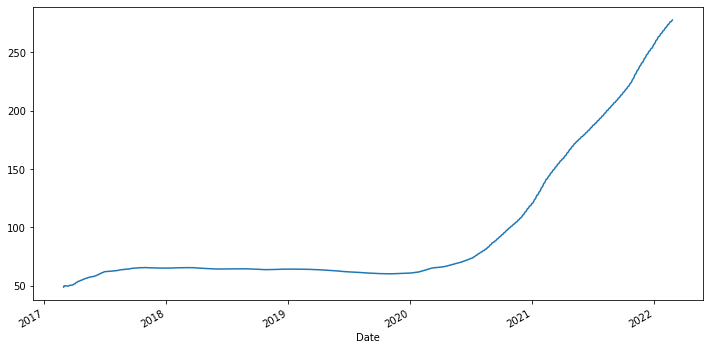

In [34]:
#Expansion

df_tesla['Open'].expanding().mean().plot(figsize = (12,6) )

### Exponential Weighted Moving Average

Formula: (close - previous EMA*multiplier) + prev EMA

multiplier = 2/(rollingwindowsize+1)

mul_10 = 2/11 = 0.181818

In [35]:
2/11

0.18181818181818182

For eg. for rolling window 10, for 1st 10 values EMA is 0. so starting from 11th entry --  11th entry is SMA. 

In [36]:
df_tesla.head(20)

,High,Low,Open,Close,Volume,Adj Close,Open: 10 day Rolling,Open: 30 day Rolling,Open: 50 day Rolling
Date,,,,,,,,,
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001,48.838001,48.838001,48.838001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002,49.837000,49.837000,49.837000
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001,49.872000,49.872000,49.872000
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999,49.941000,49.941000,49.941000
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001,49.869200,49.869200,49.869200
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999,49.955000,49.955000,49.955000
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001,49.875714,49.875714,49.875714
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000,49.832000,49.832000,49.832000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999,49.766445,49.766445,49.766445


prev ema = Average(first 10 close values)

12th entry = (49.234001 - prev_ema)*0.18181 + prev_ema. Similarly for other values

In [37]:
df_tesla['EMA_0.10'] = df_tesla['Open'].ewm(span = 5, adjust = False).mean()

<AxesSubplot:xlabel='Date'>

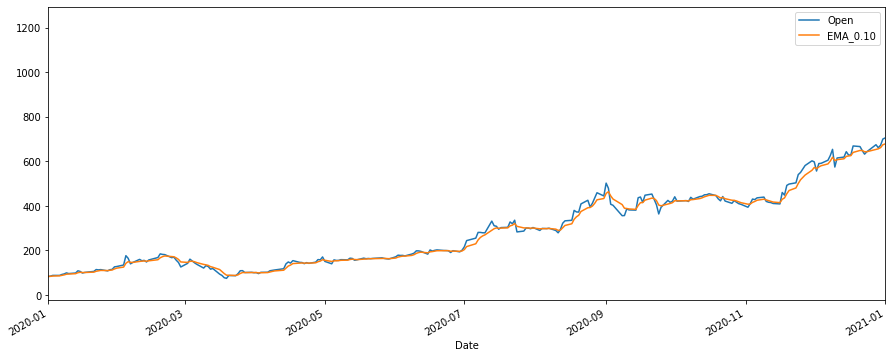

In [38]:
df_tesla[['Open', 'EMA_0.10']].plot(xlim = ['2020-01-01', '2021-01-01'], figsize = (15,6))

### ARIMA

In [39]:
df_airline = pd.read_csv("airline_passengers.csv")
df_airline.head(3)

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0


In [40]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [41]:
df_airline.dropna(axis = 0, inplace=True)

In [42]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [43]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [44]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [45]:
df_airline.set_index('Month', inplace=True)

In [46]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [47]:
df_airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0
1960-11-01,390.0
1960-12-01,432.0


<AxesSubplot:xlabel='Month'>

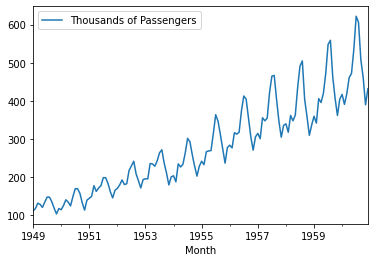

In [48]:
df_airline.plot() # seasonal data --  increasing trend

###  Dickey Fuller Test - Differencing

In [49]:
#!pip install statsmodels

In [50]:
from statsmodels.tsa.stattools import adfuller

In [57]:
def adfuller_test(series):
    
    result = adfuller(series)
    print("ADF Stats:", result[0])
    print("p-value:", result[1])   
    if(result[1] <= 0.05): #if result's p value is < 0.05 -- no unit root at stationary
        print("Reject")
    else:
        print("Accept")
        

In [58]:
adfuller_test(df_airline['Thousands of Passengers'])

ADF Stats: 0.8153688792060482
p-value: 0.991880243437641
Accept


In [59]:
# using differencing technique

df_airline['First_Diff'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(1)
df_airline.head()

,Thousands of Passengers,First_Diff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [60]:
adfuller_test(df_airline['First_Diff'].dropna())

ADF Stats: -2.8292668241699994
p-value: 0.0542132902838255
Accept


In [61]:
df_airline['Second_Diff'] = df_airline['First_Diff'] - df_airline['First_Diff'].shift(1)
df_airline.head()

,Thousands of Passengers,First_Diff,Second_Diff
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [62]:
adfuller_test(df_airline['Second_Diff'].dropna())

ADF Stats: -16.384231542468505
p-value: 2.7328918500142407e-29
Reject


Now the data has no unit root and is stationary.

In [65]:
# !2 months shift -- when data is seasonal use 12 months difference
df_airline['12_diff'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(12)
print(df_airline.head())
adfuller_test(df_airline['12_diff'].dropna())

            Thousands of Passengers  First_Diff  Second_Diff  12_diff
Month                                                                
1949-01-01                    112.0         NaN          NaN      NaN
1949-02-01                    118.0         6.0          NaN      NaN
1949-03-01                    132.0        14.0          8.0      NaN
1949-04-01                    129.0        -3.0        -17.0      NaN
1949-05-01                    121.0        -8.0         -5.0      NaN
ADF Stats: -3.383020726492481
p-value: 0.011551493085514952
Reject


C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


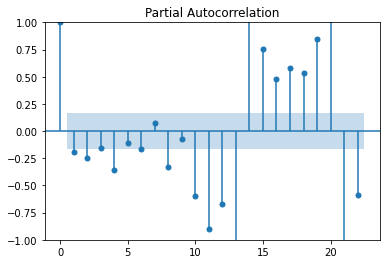

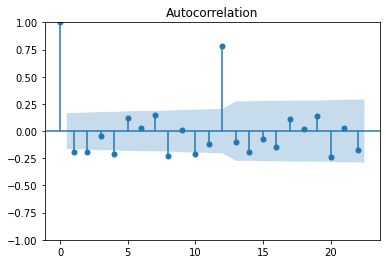

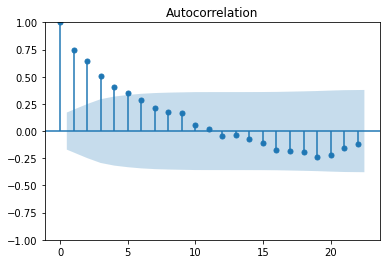

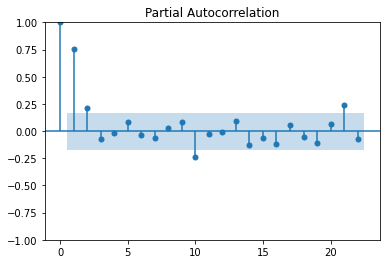

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf = plot_pacf(df_airline['Second_Diff'].dropna())
acf = plot_acf(df_airline['Second_Diff'].dropna())
acf_12 = plot_acf(df_airline['12_diff'].dropna())
pacf_12 = plot_pacf(df_airline['12_diff'].dropna())

Autocorrelation Second difference shows that after 12 instances there is a striking high correlation value, hence we can get information from the 12 difference plots.

From the autocorrelation plot of 12 difference we see that the p value comes out to be 5,
and from the partial autocorrelation plot of 12 diff we see that the q value comes out to be 2

### Training using ARIMA model

In [72]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1) #15 years train
test_dataset_end=datetime(1960,12,1) #5 years test

In [73]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [74]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [79]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [150]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,2))

C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [151]:
model_Arima_fit=model_ARIMA.fit()

C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [152]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 2)   Log Likelihood                -325.060
Date:                     Mon, 28 Feb 2022   AIC                            676.120
Time:                             18:14:25   BIC                            707.407
Sample:                         01-01-1949   HQIC                           688.681
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0129      0.106      0.122      0.903      -0.194       0.220
ar.L2         -0.6313      0.099     -6.392      0.000      -0.825      -0.438
ar.L3         -0.2744      0.092     -2.988      0.003      -0.454      -0.094
ar.L4         -0.5899      0.080     -7.346      0.000      -0.747      -0.432
ar.L5         -0.2705      0.110     -2.453      0.014      -0.487      -0.054
ar.L6         -0.5142      0.098     -5.256      0.000      -0.706      -0.322
ar.L7         -0.2707      0.116     -2.334      0.020      -0.498      -0.043
ar.L8         -0.6688      0.100     -6.691      0.000      -0.865      -0.473
ar.L9         -0.1748      0.101     -1.739      0.082      -0.372       0.022
ar.L10        -0.6723      0.111     -6.033      0.000      -0.891      -0.454
ma.L1         -1.2887      0.143     -8.992      0.000      -1.570      -1.008
ma.L2          0.5496      0.134      4.099      0.000       0.287       0.812
sigma2       136.0973     28.739      4.736      0.000      79.770     192.424
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.27   Prob(JB):                         0.64
Heteroskedasticity (H):               2.66   Skew:                             0.20
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [153]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [154]:
pred = model_Arima_fit.predict(start = pred_start_date, end = pred_end_date)
residuals = df_airline['Thousands of Passengers'] - pred

In [155]:
residuals.tail()

1960-08-01     40.069645
1960-09-01    -32.589614
1960-10-01    -48.797065
1960-11-01   -102.927022
1960-12-01    -63.864371
dtype: float64

<AxesSubplot:ylabel='Density'>

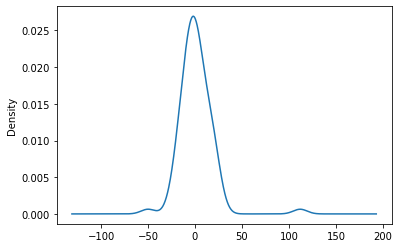

In [156]:
model_Arima_fit.resid.plot(kind='kde')

In [157]:
test_data['Predicted_ARIMA']=pred

C:\Users\verma\AppData\Local\Temp/ipykernel_14100/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

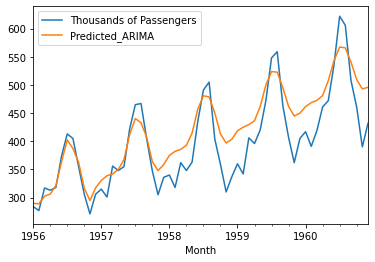

In [158]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

### Training using SARIMAX model

In [159]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [160]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12)) #p=3,q=5

C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [161]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\verma\anaconda3\envs\eda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [162]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Mon, 28 Feb 2022   AIC                            548.481
Time:                                     18:16:14   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5983      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4525      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1837      1.165      0.158      0.875      -2.099       2.467
ma.L2         -0.5341      1.263     -0.423      0.672      -3.009       1.940
ma.L3         -0.0986      0.384     -0.257      0.798      -0.852       0.655
ma.L4         -0.1273      0.338     -0.377      0.706      -0.789       0.535
ma.L5          0.2471      0.357      0.693      0.489      -0.452       0.947
sigma2        87.7323     81.217      1.080      0.280     -71.451     246.915
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [163]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

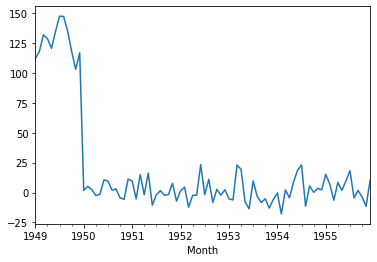

In [164]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

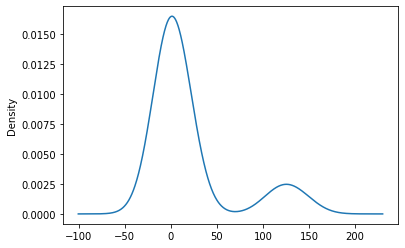

In [165]:
model_SARIMA_fit.resid.plot(kind='kde')

In [166]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\verma\AppData\Local\Temp/ipykernel_14100/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<AxesSubplot:xlabel='Month'>

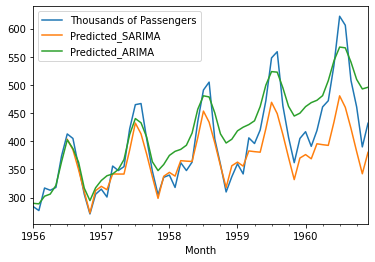

In [167]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()